# 作業

- 作業目標 : iris (dataset.load_iris()) 資料嘗試跑 kmeans (可以測試不同的群數 , init 等)

In [1]:
from sklearn import datasets
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [12]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

### 載入 相關套件 並 執行 kmean 實驗 ...

- 實驗測試不同的群數
- 實驗測試不同的初始值
- 呈現結果

In [3]:
estimators = [('k_means_8', KMeans(n_clusters=8)),
              ('k_means_3', KMeans(n_clusters=3)),
              ('k_means_bad_init', KMeans(n_clusters=3, n_init=1,
                                               init='random'))]

In [4]:
X.shape

(150, 4)

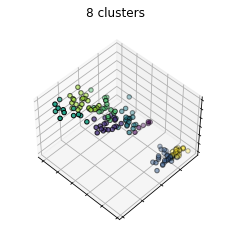

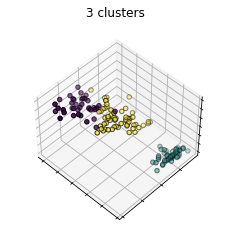

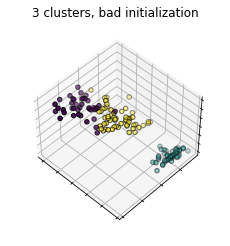

In [5]:
fignum = 1
titles = ['8 clusters', '3 clusters', '3 clusters, bad initialization']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134, auto_add_to_figure=False)
    fig.add_axes(ax)
    ## fit data
    est.fit(X)
    
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(np.float64), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1



In [6]:
type(y[0])

numpy.int64

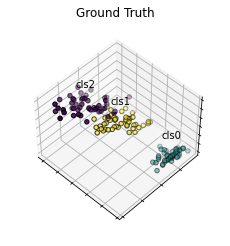

In [7]:
# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134, auto_add_to_figure=False)
fig.add_axes(ax)

for name, label in [('cls0', 0),
                    ('cls1', 1),
                    ('cls2', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float64)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_title('Ground Truth')
ax.dist = 12

#fig.show()

## 二、np.choose()函式

choose（）函式，顧名思義，也是通過某一些條件去“選擇”相關的元素，choose的操作會比自己使用for-if-else效率要高。

**1、choose()函式的定義**

def choose(a, choices, out=None, mode='raise'):

**引數 a ：**它必須是一個 int 型的 陣列，並且 a 中的元素，必須是0~n-1之間的數，這裡的n表示的就是陣列choices陣列最外層的維度數。

**choices：**表示的是要操作的陣列，要注意的是choices的陣列的維度是一定要和a進行匹配的，如果匹配不了，會出現錯誤。

**引數out：**接收運算結果的陣列，它的維度一定要和 a 是一樣的，是可選引數。

**引數mode：**預設的是raise，表示的是a陣列中的元素不能超過 n ，她還有兩個可選值，

​        clip：將 a 中的 元素 如果小於0，則將其變為0，如果大於n-1，則變為n-1

​       wrap：將a中的值 value變為value mod n，即值除以n的餘數。

**2、choose的應用**

**（1）當a和choices都是相同維數的時候——a為1維，choices為1維**

In [11]:
result=np.array([0,0,0,0,0])
aa=np.choose([4,2,1,1, 0],[11,22,33,44,55],out=result)  #當a,與choices的尾數相同的時候
print(aa)
print(result)  #result是out輸出的，這裡和aa的結果是一樣的

[55 33 22 22 11]
[55 33 22 22 11]
